# 레버리지 분석과 아웃라이어 분석
- `레버리지 분석, 아웃라이어 분석` : 개별적인 데이터 하나하나가 회귀분석에 미치는 영향을 확인 할 수 있는 방법
- `레버리지 leverage` : 실제 종속변수값 y가 예측치(predicted target) hat{y}에 미치는 영향
    - self-influence, self-sensitivity

## 1. 수학적 정의 
- `영향도 행렬(influence matrix, hat matrix)의 대각성분 h_ii와 같다.`
    - 종속변수 y와 예측치의 관계
        - $\hat{y} = X\hat{w} = X(X^TX)^{-1}X^T = Hy$
        - H : 영향도 행렬, hat 행렬
    - 영향도 행렬의 i번째 행, j번째 열의 성분 h_ij와 실제 결과값 y_i, 예측값 hat{y}i의 관계
        - $\hat{y}_i = h_{i1}y_1 + h_{i2}y_2 + \cdots + h_{iN}y_N$
- **레버리지는 실제의 결과값 yi가 예측값 hat{y}i에 미치는 영향, 예측점을 자기 자신의 위치로 끌어당기는 정도를 의미한다.**


## 2. 레버리지의 수학적 특성
- 모든 레버리지 값이 1이고 나머지 성분들이 모두 0이면 예측값과 실제 결과값(종속값)은 일치하게 된다. 
    - $h_{ii} = 1, h_{ij} = 0 \; (for \; i \neq j) \rightarrow \hat{y}_i = y_i$
    - 영향도 행렬의 대각성분은 모두 1, 비대각성분이 모두 0인 경우와 같다. 
    - 그러나 레버리지의 특성에 따라서 현실적으로 이러한 경우는 발생하지 않는다.
- 특성 
    - 1) 1보다 같거나 작은 양수 혹은 0이다.
        - $0 \leq h_{ii} \leq 1$ 
    - 2) 레버리지의 합은 모형에 사용된 독립변수(모수 parameter, 계수 coefficient)의 갯수 K와 같다. 상수항이 있는 경우 상수항도 모수에 포함된다. 
        - $tr(H) = \sum_{i}^{N}h_{ii} = K$
- 두가지 특성에 의해서 레버리지는 K라는 값(모수의 갯수)을 N개의 변수(데이터의 수, 행의 갯수)가 나누어 갖는 것과 같다. 
- 현실적으로 데이터의 갯수 N이 모수의 갯수 M보다 크기 때문에, 레버리지값이 모두 1인 경우는 발생하지 않는다. 
- **레버리지 평균값 K / N 보다 2~4배 크면 레버리지가 크다고 말한다.**
    - 데이터의 무리에서 멀리 떨어져 있는 데이터 일 수록 레버리지값이 크다.

## 3. stats models로 레버리지 계산

### 3-1. 100개의 선형회귀 데이터 생성

In [1]:
from sklearn.datasets import make_regression

In [2]:
x0, y, coef = make_regression(n_samples=100, n_features=1, noise=20,
                             coef=True, random_state=1)

In [3]:
x0

array([[-0.61175641],
       [-0.24937038],
       [ 0.48851815],
       [ 0.76201118],
       [ 1.51981682],
       [ 0.37756379],
       [ 0.51292982],
       [-0.67124613],
       [-1.39649634],
       [ 0.31563495],
       [-0.63699565],
       [-0.39675353],
       [-1.10061918],
       [ 0.90085595],
       [-1.09989127],
       [ 0.82797464],
       [-0.07557171],
       [-0.35224985],
       [-0.67066229],
       [-1.07296862],
       [-0.30620401],
       [ 2.18557541],
       [ 0.86540763],
       [ 0.19829972],
       [-0.38405435],
       [-0.68372786],
       [ 0.05080775],
       [ 0.58281521],
       [ 1.25286816],
       [-0.75439794],
       [-0.34934272],
       [-0.88762896],
       [ 0.18656139],
       [ 0.87616892],
       [ 0.83898341],
       [-0.50446586],
       [-0.34385368],
       [ 1.6924546 ],
       [-2.3015387 ],
       [ 0.93110208],
       [ 2.10025514],
       [ 1.46210794],
       [-0.84520564],
       [-0.87785842],
       [-0.3224172 ],
       [ 0

In [4]:
y

array([-5.55385928e+01, -1.06619847e+01,  2.27574081e+01,  1.01096129e+02,
        1.44337558e+02,  3.32888330e+01,  3.30152710e+01, -2.58869694e+01,
       -9.96391397e+01,  2.38030714e+01, -4.55886864e+01, -8.33875709e+00,
       -9.53154191e+01,  3.64072963e+01, -8.72926036e+01,  6.76693724e+01,
       -1.36866100e+01, -5.54414224e+01, -6.53402399e+01, -5.44497141e+01,
       -2.88351332e+01,  1.78835048e+02,  6.50839520e+01,  2.66683131e+01,
       -1.85459706e+01, -4.14990408e+01,  8.55827764e-01,  4.45616521e+01,
        1.15984811e+02, -6.46197993e+01, -2.59312718e+01, -6.08820426e+01,
        1.87195482e+01,  7.50696998e+01,  1.17203175e+02, -2.26982690e+01,
       -5.63625811e+01,  1.80837188e+02, -1.92574950e+02,  6.85032358e+01,
        1.65522025e+02,  1.05000391e+02, -7.04338757e+01, -5.87693362e+01,
       -4.15757142e+01,  7.32472269e+01,  4.09664082e+01,  8.04619460e+01,
       -2.87939943e+01,  3.42341054e+01, -4.17148764e+01,  1.43547375e+01,
        7.93363240e+01,  

In [5]:
coef

array(80.71051956)

In [6]:
len(x0), len(y)

(100, 100)

### 3-2. 레버리지가 높은 가상 데이터 추가

In [7]:
data_100 = (4, 300)
data_101 = (3, 150)

X0 = np.vstack([x0, np.array([data_100[:1], data_101[:1]])])
X0

array([[-0.61175641],
       [-0.24937038],
       [ 0.48851815],
       [ 0.76201118],
       [ 1.51981682],
       [ 0.37756379],
       [ 0.51292982],
       [-0.67124613],
       [-1.39649634],
       [ 0.31563495],
       [-0.63699565],
       [-0.39675353],
       [-1.10061918],
       [ 0.90085595],
       [-1.09989127],
       [ 0.82797464],
       [-0.07557171],
       [-0.35224985],
       [-0.67066229],
       [-1.07296862],
       [-0.30620401],
       [ 2.18557541],
       [ 0.86540763],
       [ 0.19829972],
       [-0.38405435],
       [-0.68372786],
       [ 0.05080775],
       [ 0.58281521],
       [ 1.25286816],
       [-0.75439794],
       [-0.34934272],
       [-0.88762896],
       [ 0.18656139],
       [ 0.87616892],
       [ 0.83898341],
       [-0.50446586],
       [-0.34385368],
       [ 1.6924546 ],
       [-2.3015387 ],
       [ 0.93110208],
       [ 2.10025514],
       [ 1.46210794],
       [-0.84520564],
       [-0.87785842],
       [-0.3224172 ],
       [ 0

In [8]:
np.array([data_100]), np.array([data_101])

(array([[  4, 300]]), array([[  3, 150]]))

In [9]:
np.array([data_100[:1]]), np.array([data_101[:1]])

(array([[4]]), array([[3]]))

### 3-3. 상수항 추가

In [10]:
X = sm.add_constant(X0)
X

array([[ 1.        , -0.61175641],
       [ 1.        , -0.24937038],
       [ 1.        ,  0.48851815],
       [ 1.        ,  0.76201118],
       [ 1.        ,  1.51981682],
       [ 1.        ,  0.37756379],
       [ 1.        ,  0.51292982],
       [ 1.        , -0.67124613],
       [ 1.        , -1.39649634],
       [ 1.        ,  0.31563495],
       [ 1.        , -0.63699565],
       [ 1.        , -0.39675353],
       [ 1.        , -1.10061918],
       [ 1.        ,  0.90085595],
       [ 1.        , -1.09989127],
       [ 1.        ,  0.82797464],
       [ 1.        , -0.07557171],
       [ 1.        , -0.35224985],
       [ 1.        , -0.67066229],
       [ 1.        , -1.07296862],
       [ 1.        , -0.30620401],
       [ 1.        ,  2.18557541],
       [ 1.        ,  0.86540763],
       [ 1.        ,  0.19829972],
       [ 1.        , -0.38405435],
       [ 1.        , -0.68372786],
       [ 1.        ,  0.05080775],
       [ 1.        ,  0.58281521],
       [ 1.        ,

### 3-4. 종속변수에 레버리지 큰 데이터 추가

In [11]:
y = np.hstack([y, [data_100[1], data_101[1]]])
y

array([-5.55385928e+01, -1.06619847e+01,  2.27574081e+01,  1.01096129e+02,
        1.44337558e+02,  3.32888330e+01,  3.30152710e+01, -2.58869694e+01,
       -9.96391397e+01,  2.38030714e+01, -4.55886864e+01, -8.33875709e+00,
       -9.53154191e+01,  3.64072963e+01, -8.72926036e+01,  6.76693724e+01,
       -1.36866100e+01, -5.54414224e+01, -6.53402399e+01, -5.44497141e+01,
       -2.88351332e+01,  1.78835048e+02,  6.50839520e+01,  2.66683131e+01,
       -1.85459706e+01, -4.14990408e+01,  8.55827764e-01,  4.45616521e+01,
        1.15984811e+02, -6.46197993e+01, -2.59312718e+01, -6.08820426e+01,
        1.87195482e+01,  7.50696998e+01,  1.17203175e+02, -2.26982690e+01,
       -5.63625811e+01,  1.80837188e+02, -1.92574950e+02,  6.85032358e+01,
        1.65522025e+02,  1.05000391e+02, -7.04338757e+01, -5.87693362e+01,
       -4.15757142e+01,  7.32472269e+01,  4.09664082e+01,  8.04619460e+01,
       -2.87939943e+01,  3.42341054e+01, -4.17148764e+01,  1.43547375e+01,
        7.93363240e+01,  

In [12]:
y[-2:]

array([300., 150.])

In [13]:
data_100[1:], data_101[1:]

((300,), (150,))

### 3-5. 스캐터 플롯으로 데이터 분포 확인
- x축 : 독립변수 X0의 값
- y축 : 종속변수 y의 값
- 레버리지가 큰 데이터가 추가 됨

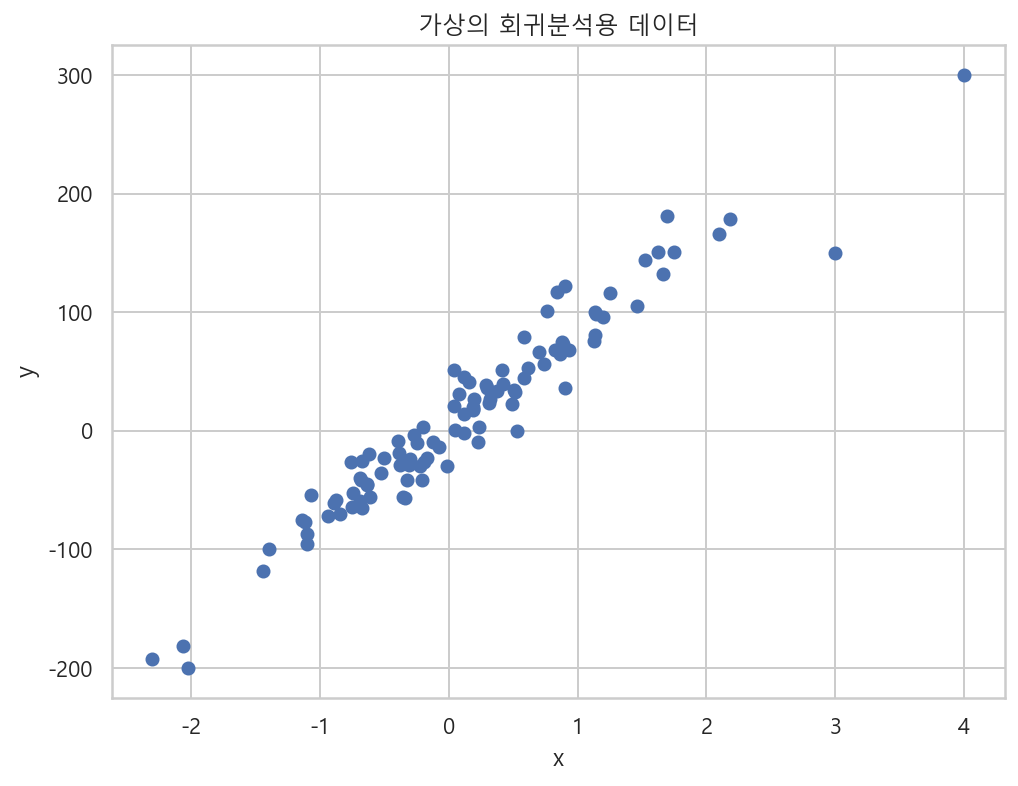

In [14]:
%matplotlib inline

plt.figure(figsize=(8, 6))
plt.scatter(X0, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("가상의 회귀분석용 데이터")
plt.show() ; 

### 3-6. 선형회귀 분석 OLS 실행
- 레버리지가 큰 데이터가 없는 최초의 데이터의 계수값과 레버리지가 큰 데이터를 추가한 데이터의 계수값이 다르다. 
    - x0 : 최초의 데이터
    - X : 상수항 추가, 레버리지가 큰 데이터 추가
- 모든 데이터에는 레버리지값이 존재한다. 여기에서 추가한 것은 인위적으로 레버리지가 큰 데이터를 추가한 것    

In [15]:
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     1464.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           1.61e-61
Time:                        18:39:47   Log-Likelihood:                -452.71
No. Observations:                 102   AIC:                             909.4
Df Residuals:                     100   BIC:                             914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              3.2565      2.065      1.577      0.1

In [16]:
coef

array(80.71051956)

In [17]:
result.params

0     3.256462
1    78.337878
dtype: float64

### 3-7. 영향도 정보 객체
- hat_matrix, cooks_distance, k_vars 값들이 내장 되어 있음

In [18]:
influence = result.get_influence()
influence

#### 영향도 행렬, hat 행렬
- 독립변수가 한 개이므로 열벡터의 형태이다.

In [19]:
hat = influence.hat_matrix_diag
hat

array([0.01516695, 0.01119963, 0.01107744, 0.01374277, 0.02878656,
       0.01041415, 0.01125576, 0.01606417, 0.03257963, 0.01014885,
       0.01553914, 0.01250262, 0.02459694, 0.01565692, 0.02457942,
       0.01460505, 0.01021012, 0.0120643 , 0.01605503, 0.0239386 ,
       0.01165165, 0.05129059, 0.0151323 , 0.00985232, 0.01237359,
       0.01626123, 0.00986235, 0.01183083, 0.02220309, 0.0174345 ,
       0.01203702, 0.01991263, 0.0098375 , 0.01528896, 0.01475726,
       0.01372415, 0.01198596, 0.03378783, 0.06764843, 0.01612402,
       0.04792128, 0.02724502, 0.0190858 , 0.01971908, 0.01179221,
       0.01542131, 0.00981397, 0.0196743 , 0.01228633, 0.01117811,
       0.0109163 , 0.00980453, 0.01186491, 0.01016148, 0.01638805,
       0.01298791, 0.02104222, 0.01086322, 0.01139019, 0.01349858,
       0.01058338, 0.00980472, 0.01755271, 0.01065946, 0.01009433,
       0.02562309, 0.00983591, 0.02089362, 0.01528715, 0.0250016 ,
       0.03402463, 0.01100677, 0.03174496, 0.01214893, 0.01631

In [20]:
hat.shape

(102,)

In [21]:
len(hat), len(X), len(y)

(102, 102, 102)

### 3-8. 레버리지 값 확인
- 각 데이터에 해당하는 레버리지 값이 영향도 행렬에 있다.
- 레버리지 값이 큰 데이터가 보인다.

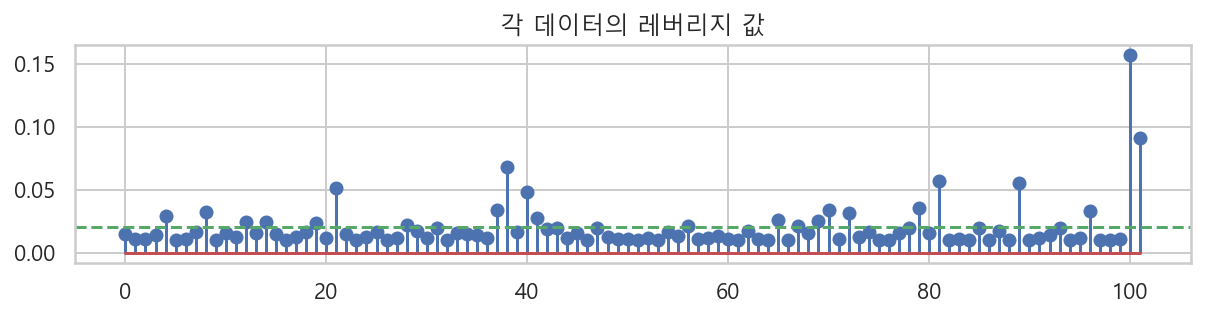

In [22]:
plt.figure(figsize=(10, 2))
plt.stem(hat)
plt.axhline(0.02, c="g", ls="--")
plt.title("각 데이터의 레버리지 값")
plt.show() ;

### 3-9. 레버리지의 합은 모수의 갯수
- 현재 데이터는 독립변수 1개와 상수항이 있으므로 모수의 갯수는 2
- 레버리지의 합이 2와 같다.
    - 데이터의 갯수 N이 독립변수의 갯수 K보다 크므로, 레버리지의 값은 1보다 작아지게 된다. 

In [24]:
hat.sum()

2.0000000000000004

In [25]:
hat.mean()

0.019607843137254905

### 3-10. 회귀분석 결과와 레버리지 포인트
- 레버리지가 큰 데이터 표시
- **데이터가 무리지어 있지 않고 단독으로 존재할 수록 레버리지가 커진다는 것을 알 수 있다.**

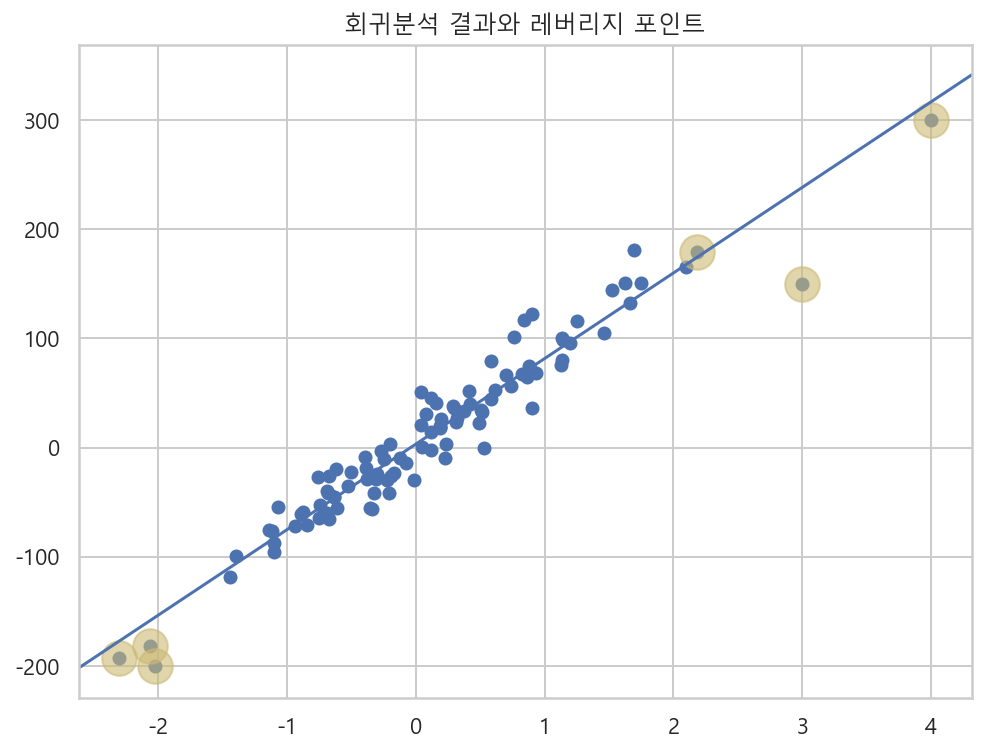

In [29]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

# 레버리지가 큰 데이터만 빨간색 원으로 그리기
idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c="y", alpha=0.6)
plt.title("회귀분석 결과와 레버리지 포인트")

plt.show() ; 

#### 레버리지가 큰 데이터의 인덱스

In [30]:
t_list = []

for n in range(len(idx)) :
    if idx[n] == True :
        t_list.append(n)

In [31]:
t_list

[21, 38, 81, 89, 100, 101]

In [32]:
idx[21]

True

In [35]:
np.where(idx)[0]

array([ 21,  38,  81,  89, 100, 101], dtype=int64)

### 3-11. 추가한 데이터의 레버리지값
- 평균 레버리지값보다 4배 이상이다.

In [46]:
ht = hat.mean()
h_100 = hat[100]
h_101 = hat[101]

print("레버리지 평균 : {:.5f}".format(ht))
print("레버리지 평균와 이상 레버리지의 비율 : {:.2f}".format(h_100 / ht))
print("레버리지 평균과 이상 레버리지의 비율 : {:.2f}".format(h_101 / ht))

레버리지 평균 : 0.01961
레버리지 평균와 이상 레버리지의 비율 : 7.99
레버리지 평균과 이상 레버리지의 비율 : 4.62


In [44]:
ht * 7.9

0.15490196078431376

In [30]:
hat[100]

0.15672094551475238

In [31]:
hat[101]

0.0906331710551901

## 4. 레버리지의 영향

### 4-1. 레버리지가 큰 데이터가 있는 경우와 없는 경우의 모형 비교

#### 원래 데이터의 OLS 분석
- 큰 레버리지 데이터를 추가하지 않은 데이터

In [47]:
model2 = sm.OLS(y[:-1], X[:-1])
result2 = model2.fit()

print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     1782.
Date:                Thu, 14 Jul 2022   Prob (F-statistic):           4.10e-65
Time:                        18:48:32   Log-Likelihood:                -437.49
No. Observations:                 101   AIC:                             879.0
Df Residuals:                      99   BIC:                             884.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.8584      1.860      2.075      0.0

In [48]:
coef

array(80.71051956)

#### 단일계수 t 검정 테스트

In [49]:
result2.t_test("x1 = 84")

<class 'statsmodels.stats.contrast.ContrastResults'>
                             Test for Constraints                             
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c0            81.0698      1.920     -1.526      0.130      77.259      84.880

### 4-2. 레버리지 큰 데이터 추가 전후 모형 비교
- 선형회귀모형의 모양이 바뀐다.
    - 이상치 레버리지를 포함하지 않는 데이터의 선형회귀모형이 기울기가 커진다.
    - 가중치값이 커졌으므로
- **즉 레버리지가 큰 데이터는 모형에 큰 영향을 끼친다.**

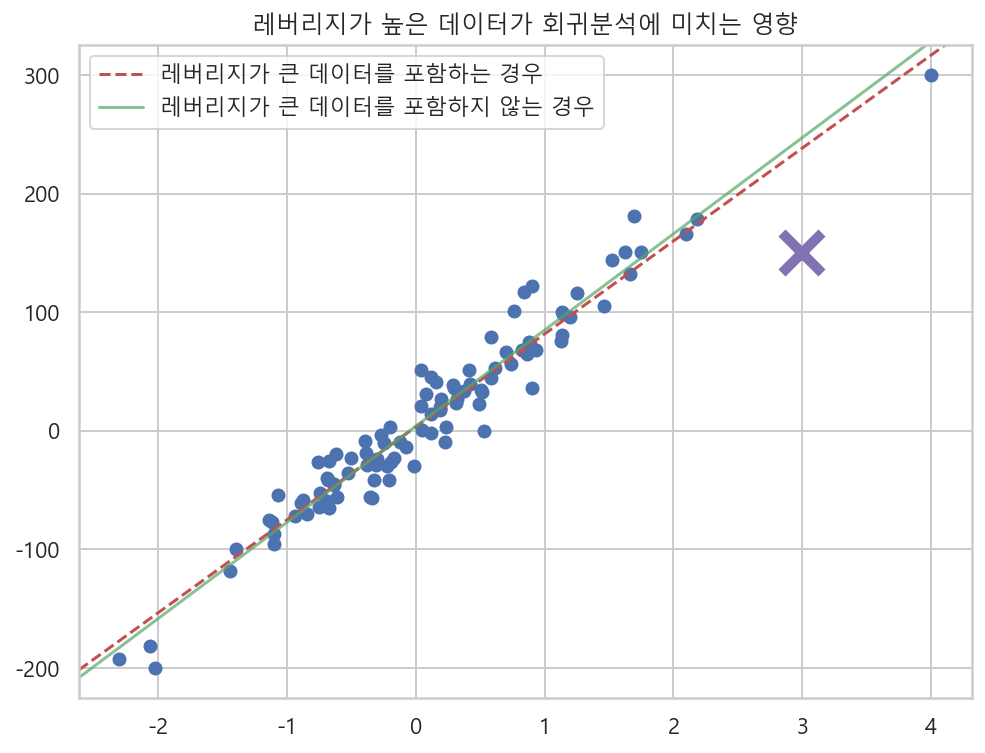

In [50]:
%matplotlib inline

plt.figure(figsize=(8, 6))
ax = plt.subplot()
# 레버리지 큰 데이터 추가한 데이터
plt.scatter(X0, y)

# 선형회귀 모델을 직선으로 나타내기
sm.graphics.abline_plot(model_results=result,
                       c="r", linestyle="--", ax=ax, label="레버리지가 큰 데이터를 포함하는 경우")

sm.graphics.abline_plot(model_results=result2,
                       c="g", alpha=0.7, ax=ax, label="레버리지가 큰 데이터를 포함하지 않는 경우")

plt.plot(X0[-1], y[-1], marker="x", c="m", ms=20, mew=5)
plt.legend(loc="upper left")
#plt.legend([u"레버리지가 큰 데이터를 포함하는 경우", u"레버리지가 큰 데이터를 포함하지 않는 경우"], loc="upper left")

plt.title("레버리지가 높은 데이터가 회귀분석에 미치는 영향")
plt.show() ; 

In [51]:
result.params

0     3.256462
1    78.337878
dtype: float64

In [52]:
result2.params

array([ 3.85836361, 81.06976073])

### 4-3. 레버리지가 작은 데이터가 있는 경우와 없는 경우의 모형 비교
- 레버리지가 작은 데이터는 있건 없건 모형에 큰 영향을 미치지 않는다.

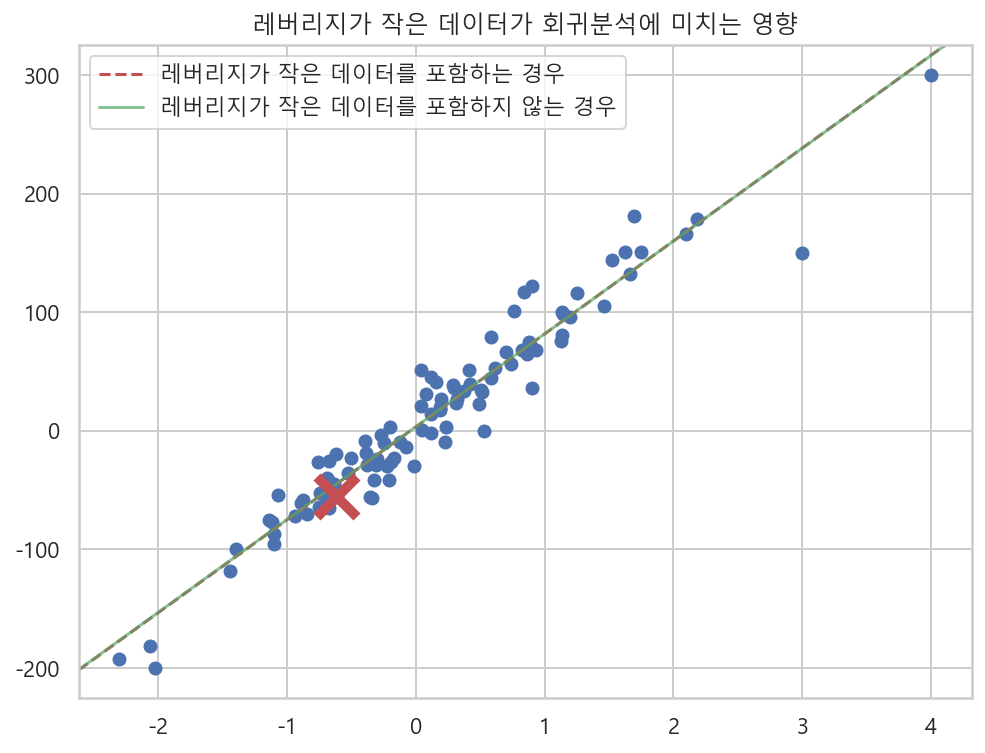

In [53]:
# 레버리지가 작은 데이터를 제외하고 OLS 분석
model3 = sm.OLS(y[1:], X[1:])
result3 = model3.fit()

plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.scatter(X0, y)

sm.graphics.abline_plot(model_results=result,
                       c="r", linestyle="--", ax=ax, label="레버리지가 작은 데이터를 포함하는 경우")
sm.graphics.abline_plot(model_results=result3,
                       c="g", linestyle="-", alpha=0.7, ax=ax, label="레버리지가 작은 데이터를 포함하지 않는 경우")

plt.plot(X0[0], y[0], marker="x", c="r", ms=20, mew=5)
plt.legend(loc="upper left")
#plt.legend([u"레버리지가 작은 데이터를 포함하는 경우", u"레버리지가 작은 데이터를 포함하지 않는 경우"], loc="upper left")

plt.title("레버리지가 작은 데이터가 회귀분석에 미치는 영향")
plt.show() ; 

### 4-4. 레버리지가 크지만 오차가 작은 데이터가 있는 경우와 없는 경우의 모델
- 레버리지가 크지만 오차가 작은 데이터는 선형회귀분석에 큰 영향을 끼치지 않는다.

In [40]:
np.array(list(range(100)) + [101])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101])

In [41]:
idx = np.array(list(range(100)) + [101])
idx

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 101])

In [42]:
model4 = sm.OLS(y[idx], X[idx, :])
result4 = model4.fit()

print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1267.
Date:                Wed, 13 Jul 2022   Prob (F-statistic):           3.09e-58
Time:                        15:49:50   Log-Likelihood:                -448.39
No. Observations:                 101   AIC:                             900.8
Df Residuals:                      99   BIC:                             906.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3539      2.070      1.620      0.1

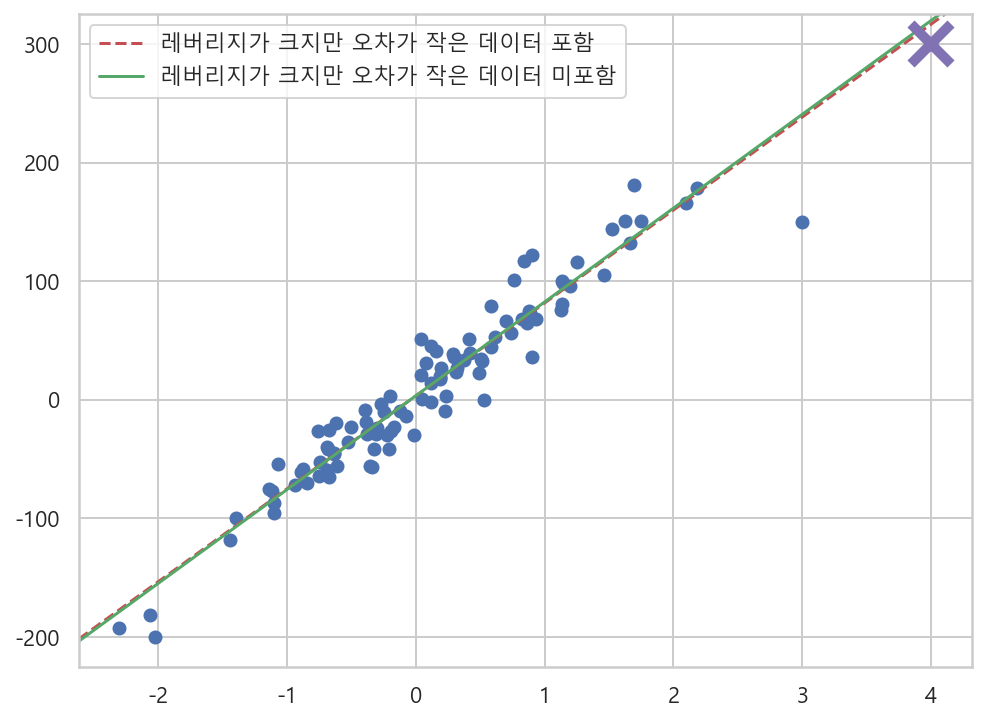

In [44]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result,
                       c="r", linestyle="--", ax=ax, label="레버리지가 크지만 오차가 작은 데이터 포함")
sm.graphics.abline_plot(model_results=result4,
                       c="g", linestyle="-", ax=ax, label="레버리지가 크지만 오차가 작은 데이터 미포함")
plt.plot(X0[-2], y[-2], marker="x", c="m", ms=20, mew=5)
plt.legend(loc="upper left")
plt.show() ; 

In [45]:
result.params

0     3.256462
1    78.337878
dtype: float64

In [46]:
result4.params

array([ 3.35387682, 79.08516062])

## 5. 아웃라이어
- `아웃라이어 outlier` : 잔차의 크기가 큰 데이터
- 잔차에서 독립변수 x의 영향을 제거한 후 표준화 된 잔차를 통해 아웃라이어를 찾는다.

## 6. 표준화 잔차
- 잔차의 공분산행렬을 구하고, 공분산 행렬의 대각성분이 잔차의 분산이라는 것을 이용하여 오차의 표준편차 추정값을 구한다.
- 1) `잔차` : 잡음(오차)과 잔차행렬로 나타낸 식
    - $e = (I-H) \epsilon = M\epsilon$
- 2) `잔차의 공분산 행렬` : 잔차행렬의 성질이용 (M은 대칭행렬, 멱등행렬)
    - 잔차행렬 -> 영향도행렬로 변환됨

$\begin{aligned} 
    \text{Cov}[e] 
    &= \text{E}[\epsilon\epsilon^T] \\
    &= \text{E}[(M\epsilon)(M\epsilon)^T] \\
    &= \text{E}[M\epsilon\epsilon^TM] \\
    &= M\text{E}[\epsilon\epsilon^T]M^T \\
    &= M\sigma^2IM^T \\
    &= \sigma^2MM^T \\
    &= \sigma^2MM \\
    &= \sigma^2M \\
    &= \sigma^2(I-H) \\
\end{aligned}$

- 3) `개별적인 잔차의 표준편차 : 영향도 행렬의 대각성분`
    - $\text{Var}[e_i] = \sigma^2(1 - h_{ii})$
    - **오차(잡음)의 표준편차는 모든 표본에 대해서 같지만, 개별적인 잔차의 표준편차는 레버리지에 따라서 달라진다는 것을 의미한다.**

- 4) `오차의 분산 추정 : 잔차의 분산으로 추정한다.`
    - $\text{Var}[e_i] \approx s^2(1 - h_{ii})$

- 5) `오차의 표준편차의 추정값`
    - $s^2 = \dfrac{e^Te}{N-K} = \dfrac{RSS}{N-K}$

- 6) `표준화 잔차 standardized residual, normalized residual, studentized residual`
    - 잔차를 레버리지(hii)와 잔차의 표준 편차(s)로 나누어 동일한 표준편차를 가지도록 스케일링한 것
    - $r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}}$

### 5-1. stats models로 개별 데이터의 잔차 계산

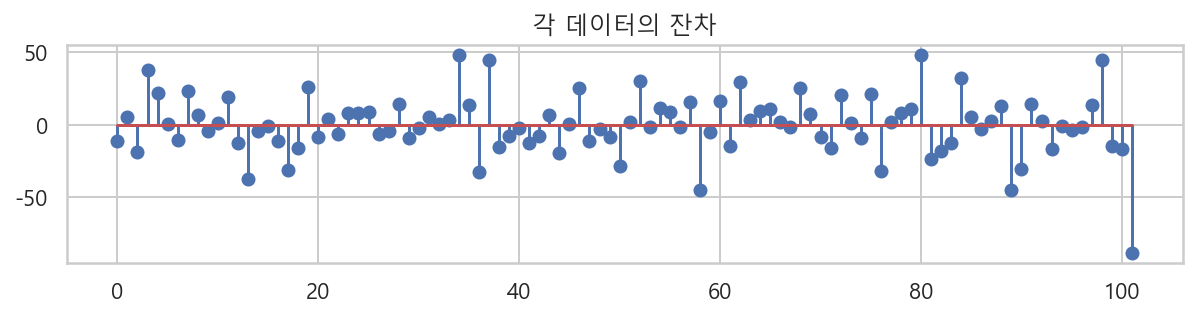

In [47]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid)
plt.title("각 데이터의 잔차")
plt.show() ; 

In [51]:
result.resid

0     -10.871355
1       5.616699
2     -18.768529
3      38.145327
4      22.021870
         ...    
97     13.935836
98     44.547812
99    -14.534512
100   -16.607976
101   -88.270097
Length: 102, dtype: float64

### 5-2. 표준화 잔차 계산
- 동일한 표준편차를 갖도록 계산한 것
- 보통 표준화 잔차가 2~4보다 크면 아웃라이어로 본다.
- result.resid_pearson 속성에 들어 있다.

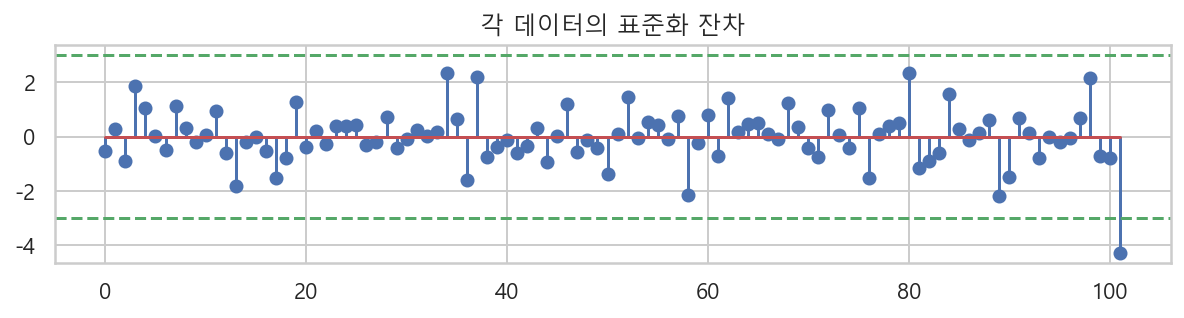

In [48]:
plt.figure(figsize=(10, 2))
plt.stem(result.resid_pearson)
plt.axhline(3, c="g", ls="--")
plt.axhline(-3, c="g", ls="--")
plt.title("각 데이터의 표준화 잔차")
plt.show() ; 

In [60]:
result.resid_pearson[result.resid_pearson > 2]

array([2.33143144, 2.17550594, 2.32624487, 2.15376846])

In [61]:
result.resid_pearson[result.resid_pearson < -2]

array([-2.16087567, -2.16663468, -4.26762488])

In [59]:
result.resid_pearson[result.resid_pearson < -4]

array([-4.26762488])

In [62]:
np.where(result.resid_pearson < -4)

(array([101], dtype=int64),)

## 6. Cook's Distance와 Fox outlier Recommendation
- `쿡스 디스턴스 cooks distance` : **레버리지와 잔차의 크기를 동시에 보기 위한 기준**
    - 레버리지 : hat 행렬에서 대각성분, 종속값 y가 예측값을 끌어당기는 정도
    - 아웃라이어 : 잔차의 크기가 큰 데이터, 표준화 된 잔차의 크기가 2~4보다 큰 데이터
    - $D_i = \dfrac{r_i^2}{RSS} \left[ \dfrac{h_{ii}}{(1-h_{ii})^2} \right]$
- `폭스 아웃라이어 레코맨데이션 fox's outlier recommendation` : 아웃라이어 판단기준, 쿡스 디스턴스가 특정한 크기보다 큰 경우에 아웃라이어라고 판단한다.
    - $D_i > \dfrac{4}{N-K-1}$
    - N : 데이터의 갯수 : 행의 갯수 
    - K : 독립변수의 갯수 : 열의 갯수 : 레버리지의 총합

### 6-1. 데이터의 레버리지와 아웃라이어
- x축 : 표준화 잔차의 제곱
- y축 : 레버리지 값    

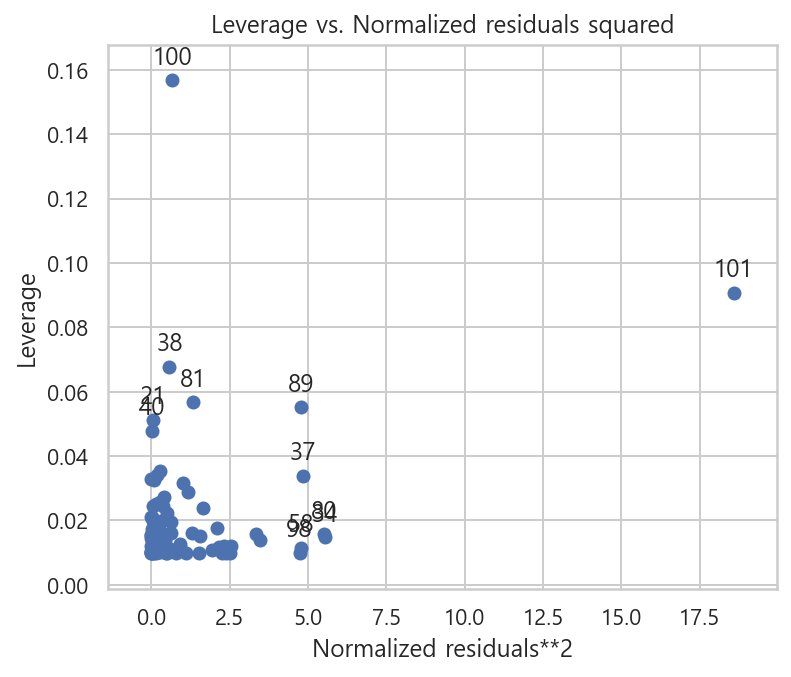

In [87]:
plt.figure(figsize=(6, 5))
ax = plt.subplot()
sm.graphics.plot_leverage_resid2(result, ax=ax)
plt.show() 

### 6-2. 쿡스 디스턴스를 버블로 나타내기

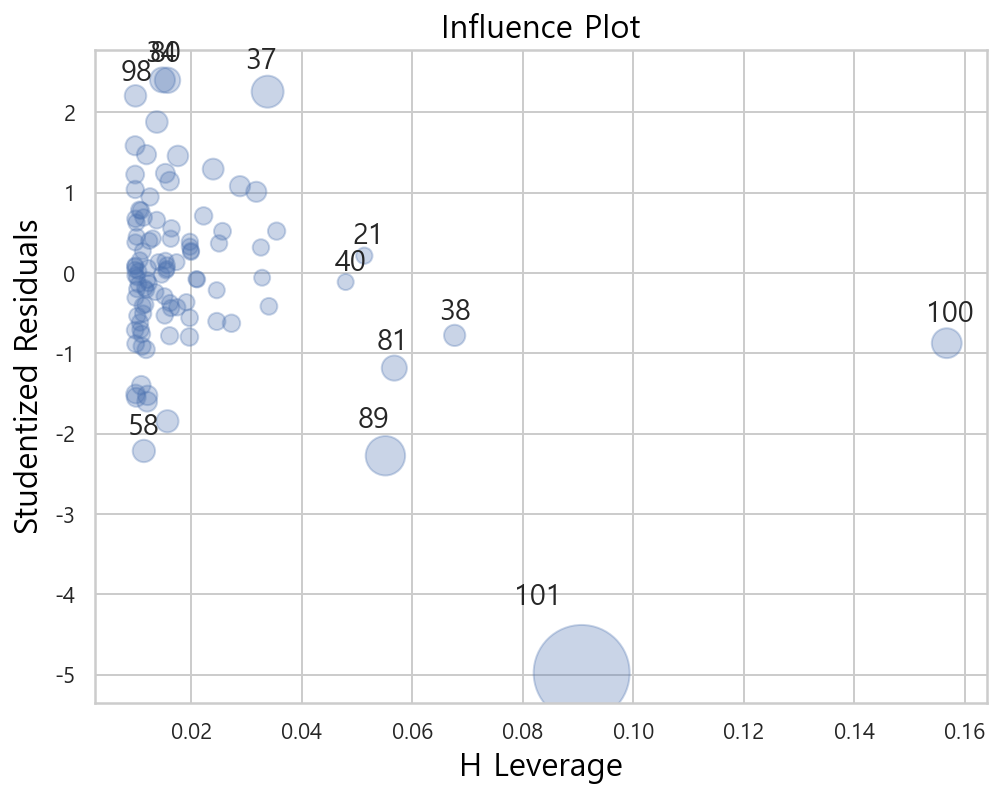

In [85]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
sm.graphics.influence_plot(result, plot_alpha=0.3, ax=ax)
plt.show() ; 

### 6-3. Fox Recommendation

In [69]:
from statsmodels.graphics import utils

In [71]:
influence

#### 쿡스디스턴스와 pvalue

In [72]:
cooks_d2, pvals = influence.cooks_distance

In [73]:
cooks_d2

array([2.16000988e-03, 4.22341642e-04, 4.66327219e-03, 2.40265790e-02,
       1.72975310e-02, 2.57110878e-06, 1.46187360e-03, 1.06555613e-02,
       1.72049320e-03, 2.11472589e-04, 2.08861459e-05, 5.68947774e-03,
       4.60980279e-03, 2.64449872e-02, 5.80796481e-04, 3.54186637e-06,
       1.47997811e-03, 1.39757537e-02, 4.99794666e-03, 2.03869419e-02,
       9.15599351e-04, 1.26912358e-03, 6.49133537e-04, 7.28832195e-04,
       1.01732718e-03, 1.52298165e-03, 4.78691283e-04, 2.68107719e-04,
       5.77064963e-03, 1.62639223e-03, 4.77921666e-05, 7.05558610e-04,
       8.43815871e-06, 1.85884423e-04, 4.13175489e-02, 3.03377224e-03,
       1.53280335e-02, 8.56457535e-02, 2.19465551e-02, 1.15236022e-03,
       3.16693207e-04, 5.50861521e-03, 1.29663630e-03, 1.09070156e-03,
       5.40759364e-03, 7.87182978e-06, 7.41302593e-03, 3.13347731e-03,
       1.03475017e-04, 9.39786637e-04, 1.06725791e-02, 3.31927406e-05,
       1.28885064e-02, 1.52074992e-05, 2.59061535e-03, 1.22490866e-03,
      

In [74]:
pvals

array([0.99784237, 0.99957775, 0.9953478 , 0.9762654 , 0.98285415,
       0.99999743, 0.99853922, 0.98940213, 0.99828102, 0.99978855,
       0.99997911, 0.994327  , 0.99540102, 0.97390843, 0.99941938,
       0.99999646, 0.99852114, 0.98612338, 0.99501477, 0.97982354,
       0.99908483, 0.9987317 , 0.99935108, 0.99927144, 0.9989832 ,
       0.9984782 , 0.99952143, 0.99973193, 0.9942463 , 0.99837496,
       0.99995221, 0.9992947 , 0.99999156, 0.99981413, 0.95954076,
       0.99697092, 0.98479116, 0.9179866 , 0.97829723, 0.99884832,
       0.99968336, 0.99450683, 0.99870422, 0.9989099 , 0.99460729,
       0.99999213, 0.99261493, 0.99687152, 0.99989653, 0.99906066,
       0.9893853 , 0.99996681, 0.98719583, 0.99998479, 0.9974128 ,
       0.99877586, 0.99993045, 0.99667054, 0.97316514, 0.99961223,
       0.99669113, 0.99748573, 0.98140669, 0.99986057, 0.99895249,
       0.9964329 , 0.99995535, 0.9999387 , 0.98817549, 0.99824347,
       0.99695036, 0.9967782 , 0.98338372, 0.99997481, 0.99841

#### 독립변수의 갯수?

In [75]:
K = influence.k_vars
K

2

In [76]:
type(K)

int

#### 폭스 추천값 계산

In [78]:
fox_cr = 4 / (len(y) - K - 1)
fox_cr

0.04040404040404041

#### 쿡스디스턴스 값이 폭스 추천값보다 크면 아웃라이어로 본다.

In [80]:
np.where(cooks_d2 > fox_cr)[0]

array([ 34,  37,  80,  81,  89, 100, 101], dtype=int64)

In [81]:
idx = np.where(cooks_d2 > fox_cr)[0]
idx

array([ 34,  37,  80,  81,  89, 100, 101], dtype=int64)

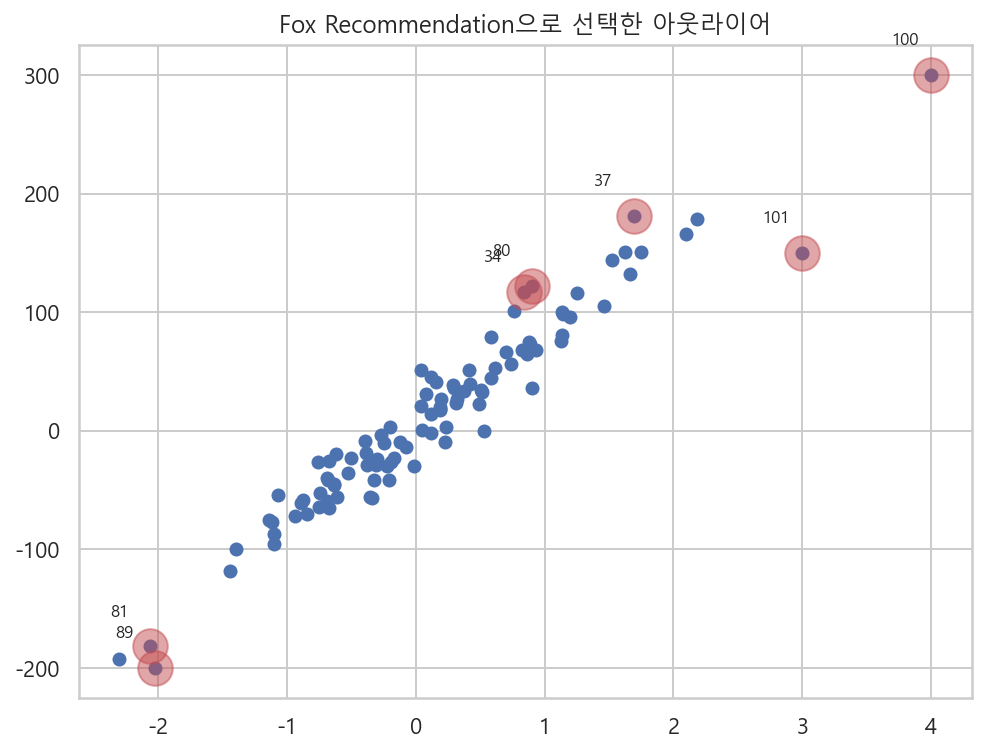

In [83]:
plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.scatter(X0, y)
plt.scatter(X0[idx], y[idx], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx)), idx,
                   list(zip(X0[idx], y[idx])), [(-20, 15)] * len(idx), size="small",
                   ax=ax)
plt.title("Fox Recommendation으로 선택한 아웃라이어")
plt.show() ; 

## 7. 보스턴 집값 예측 문제
- 보스턴 집값 데이터에서 아웃라이어를 적용해 보기

In [1]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])

In [6]:
dfX.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
dfy.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 7-1. OLS 분석

In [8]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
pred = result_boston.predict(dfX)

In [10]:
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          6.72e-135
Time:                        14:48:38   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

In [9]:
pred

0      30.003843
1      25.025562
2      30.567597
3      28.607036
4      27.943524
         ...    
501    23.533341
502    22.375719
503    27.627426
504    26.127967
505    22.344212
Length: 506, dtype: float64

### 7-2. 종속값과 예측값

In [12]:
list(zip(boston.target, pred, boston.target-pred))

[(24.0, 30.00384337701683, -6.003843377016828),
 (21.6, 25.02556237905306, -3.4255623790530585),
 (34.7, 30.567596718601564, 4.132403281398439),
 (33.4, 28.6070364887281, 4.7929635112719),
 (36.2, 27.94352423287299, 8.256475767127014),
 (28.7, 25.25628446154104, 3.44371553845896),
 (22.9, 23.001808268485394, -0.10180826848539581),
 (27.1, 19.535988428756028, 7.564011571243974),
 (16.5, 11.523636853130437, 4.976363146869563),
 (18.9, 18.92026210707599, -0.020262107075993185),
 (15.0, 18.999496511132513, -3.999496511132513),
 (18.9, 21.586795681399302, -2.6867956813993032),
 (21.7, 20.906521527835345, 0.7934784721646544),
 (20.4, 19.552902810580903, 0.8470971894190953),
 (18.2, 19.283482050090164, -1.083482050090165),
 (19.9, 19.297483208227888, 0.6025167917721106),
 (23.1, 20.527509791162295, 2.5724902088377064),
 (17.5, 16.911401346797764, 0.5885986532022365),
 (20.2, 16.178011056571858, 4.021988943428141),
 (18.2, 18.406136033332437, -0.20613603333243802),
 (13.6, 12.523857527095162, 

### 7-3. 쿡스디스턴스 값 계산
- 쿡스디스턴스값은 레버리지와 잔차의 크기를 동시에 보여준다.

In [13]:
influence_boston = result_boston.get_influence()
cooks_d2, pvals = influence_boston.cooks_distance

In [14]:
cooks_d2

array([2.00241182e-03, 4.22857395e-04, 6.55853503e-04, 1.18058057e-03,
       3.59851425e-03, 5.74194665e-04, 4.72546845e-07, 5.82635409e-03,
       4.62994000e-03, 4.01383186e-08, 1.92640255e-03, 5.67459552e-04,
       3.62408248e-05, 3.22586961e-05, 5.58811130e-05, 1.65626094e-05,
       4.91207261e-04, 1.32490825e-05, 1.27398506e-03, 1.69581259e-06,
       6.97222384e-05, 1.60947828e-04, 2.07796361e-05, 2.90688609e-05,
       3.11014124e-07, 1.38389141e-05, 6.48388494e-05, 4.41362303e-07,
       7.33485688e-05, 7.62795999e-07, 9.89547175e-05, 7.46407072e-04,
       2.28054439e-03, 7.20316848e-05, 3.22115187e-06, 7.68854322e-04,
       1.71832946e-04, 1.67793317e-04, 1.60591201e-04, 3.26965825e-05,
       5.21299660e-05, 1.81626540e-04, 7.02029486e-07, 6.26114010e-07,
       1.07290360e-04, 3.36163087e-04, 8.50425200e-06, 1.50051230e-04,
       4.98762064e-03, 2.55758721e-04, 1.04455561e-04, 6.00527884e-04,
       2.93524386e-04, 1.88430383e-05, 2.23822707e-03, 2.20578470e-03,
      

In [15]:
pvals

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

### 7-4. 모수의 갯수 확인
- 상수항과 독립변수의 갯수

In [18]:
influence_boston.k_vars

14

### 7-5. 폭스 레코멘데이션 계산
- 쿡스 디스턴스값이 폭스 레코멘데이션 값보다 큰 것을 아웃라이어로 본다.
- 이 아웃라이어에 해당하는 인덱스를 저장한다.

In [20]:
K = influence_boston.k_vars
fox_cr = 4 / (len(dfy) - K - 1)
idx = np.where(cooks_d2 > fox_cr)[0]

#### 폭스 레코멘데이션 값 확인

In [24]:
fox_cr

0.008146639511201629

In [63]:
idx

array([ 64, 141, 148, 161, 162, 163, 166, 186, 195, 214, 225, 228, 233,
       253, 262, 267, 364, 365, 367, 368, 369, 370, 371, 372, 374, 375,
       380, 412, 414], dtype=int64)

In [23]:
cooks_d2[cooks_d2 > fox_cr]

array([0.01214123, 0.01675001, 0.01158933, 0.02168078, 0.01827773,
       0.01547127, 0.02248143, 0.014522  , 0.00830143, 0.04292457,
       0.01243482, 0.0136776 , 0.00952828, 0.03349218, 0.00837929,
       0.01007734, 0.06942966, 0.06718425, 0.04541181, 0.16567369,
       0.05526255, 0.04419639, 0.04255531, 0.09409651, 0.02822754,
       0.008656  , 0.03175477, 0.05004117, 0.03476964])

In [74]:
idx2 = np.hstack([idx, np.where(boston.target == 50)[0]])
idx2

array([ 64, 141, 148, 161, 162, 163, 166, 186, 195, 214, 225, 228, 233,
       253, 262, 267, 364, 365, 367, 368, 369, 370, 371, 372, 374, 375,
       380, 412, 414, 161, 162, 163, 166, 186, 195, 204, 225, 257, 267,
       283, 368, 369, 370, 371, 372], dtype=int64)

In [58]:
t = []

for n in idx2 : 
    temp = n
    if temp not in idx :
        print(temp)
        t.append(temp)

204
257
283


In [57]:
t

[204, 257, 283]

### 7-5. 아웃라이어 확인
- 쿡스디스턴스 값이 큰 것을 아웃라이어라고 본다.
- 좀더 구체적으로는 폭스 레코멘데이션 값보다 큰 값을 아웃라이어라고 본다.

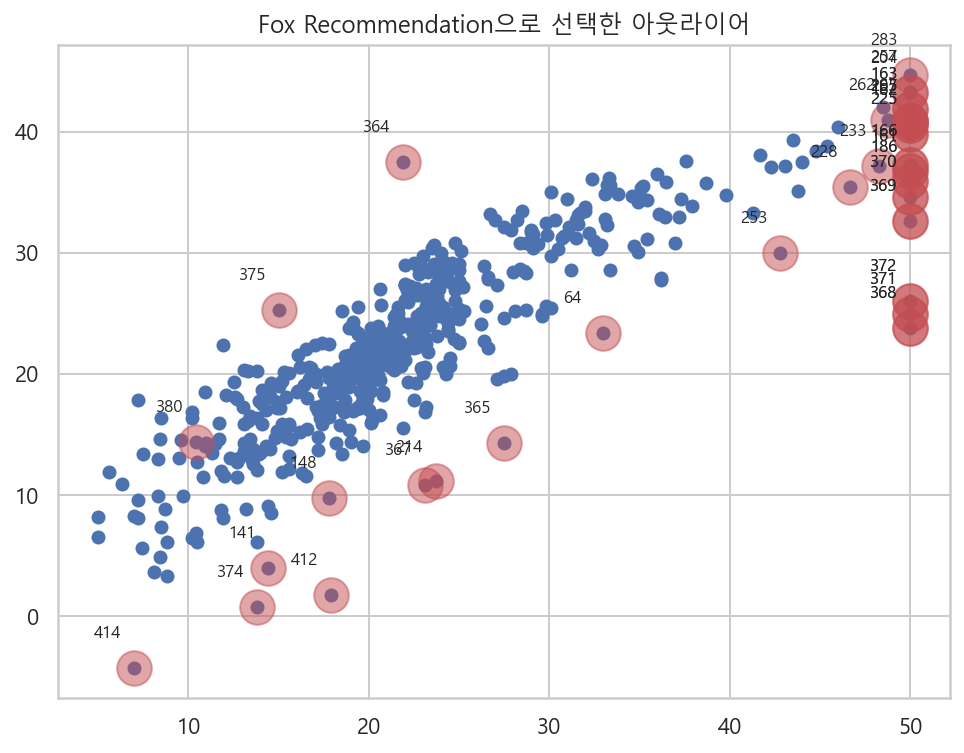

In [75]:
from statsmodels.graphics import utils
%matplotlib inline

plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.scatter(dfy, pred)
plt.scatter(dfy.MEDV[idx2], pred[idx2], s=300, c="r", alpha=0.5)
utils.annotate_axes(range(len(idx2)), idx2,
                    list(zip(dfy.MEDV[idx2], pred[idx2])),
                    [(-20, 15)] * len(idx2), size="small", ax=ax)
plt.title("Fox Recommendation으로 선택한 아웃라이어")
plt.show() ; 

In [71]:
list(zip(dfy.MEDV[idx], pred[idx]))

[(33.0, 23.373086442266253),
 (14.4, 3.988855082995901),
 (17.8, 9.718441392743921),
 (50.0, 36.774670145741254),
 (50.0, 40.55765844458037),
 (50.0, 41.84728167704112),
 (50.0, 37.20347454599937),
 (50.0, 35.88497226207714),
 (50.0, 40.84555721422642),
 (23.7, 11.11916737154203),
 (50.0, 39.81461867027562),
 (46.7, 35.45665241982788),
 (48.3, 37.16328631468485),
 (42.8, 29.94563374480101),
 (48.8, 40.98928500887788),
 (50.0, 40.83955749624978),
 (21.9, 37.49447389969516),
 (27.5, 14.281907341200032),
 (23.1, 10.831623241057127),
 (50.0, 23.80072902209159),
 (50.0, 32.6440736012498),
 (50.0, 34.606840424466746),
 (50.0, 24.94331332514429),
 (50.0, 25.999809100736037),
 (13.8, 0.7777980595705785),
 (15.0, 25.30713064171827),
 (10.4, 14.369948254881887),
 (17.9, 1.718518067817719),
 (7.0, -4.281310709184833)]

### 7-6. 폭스 아웃라이어를 제거한 데이터로 OLS 분석
- 쿡스 디스턴스 값에서 폭스 레코멘데이션 값의 기준을 적용한 데이터를 제거한다.
    - idx3에 아웃라이어를 제거하고 남은 인덱스 값이 들어있다.
    
### 7-7. 집합에서 집합을 뺸 후 리스트로 만들면 편하다.
- 어떤 인덱스에서 특정한 인덱스만 빼고 싶을 때 좋은 방법
    - set()으로 만든 후 집합의 연산 명령어를 사용하여 특정한 값만 제거, 추가
    - 그 결과를 list()로 만든다.
- 보통 리스트로 먼저 만들고 여기에서 빼고자하는 것을 반복문으로 고른다음에 제거하려고 하는데, set()으로 만들고 제거하거나 추가하는게 더 간편하다.
- **특히 데이터프레임에서 특정한 조건의 인덱스를 원래 인덱스에서 제거하고 싶을때 사용하면 좋을 것 같다.**    

In [81]:
idx3 = list(set(range(len(dfX))).difference(idx2))
idx3

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,

In [85]:
list(set(range(len(dfX))).difference(idx2))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 142,
 143,
 144,
 145,
 146,
 147,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 164,
 165,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 190,
 191,
 192,

In [83]:
len(idx3)

474

#### 아웃라이어를 제거하면 모형에 큰 영향을 준다.
- 결과값이 바뀐다.

In [88]:
dfX = dfX.iloc[idx3, :].reset_index(drop=True)
dfy = dfy.iloc[idx3, :].reset_index(drop=True)
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()

print(result_boston2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     167.4
Date:                Thu, 14 Jul 2022   Prob (F-statistic):          5.38e-165
Time:                        15:42:28   Log-Likelihood:                -1217.1
No. Observations:                 474   AIC:                             2462.
Df Residuals:                     460   BIC:                             2520.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0998      3.986      5.544      0.0

In [89]:
result_boston.params

const      36.459488
CRIM       -0.108011
ZN          0.046420
INDUS       0.020559
CHAS        2.686734
NOX       -17.766611
RM          3.809865
AGE         0.000692
DIS        -1.475567
RAD         0.306049
TAX        -0.012335
PTRATIO    -0.952747
B           0.009312
LSTAT      -0.524758
dtype: float64

In [90]:
result_boston2.params

const      22.099832
CRIM       -0.092738
ZN          0.033565
INDUS      -0.016693
CHAS        1.164002
NOX       -10.855619
RM          4.615026
AGE        -0.020380
DIS        -1.097709
RAD         0.200884
TAX        -0.011779
PTRATIO    -0.752910
B           0.010493
LSTAT      -0.366785
dtype: float64